<a href="https://colab.research.google.com/github/anu-mohan/Ds_pythoncode/blob/main/Random_Forest_CompanyData_(Anisha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company=pd.read_csv("/content/Company_Data.csv")
company.head(10)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [3]:
company.shape

(400, 11)

In [4]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)

In [7]:
company['ShelveLoc']=company['ShelveLoc'].astype('category')

In [8]:
company['Urban']=company['Urban'].astype('category')

In [9]:
company['US']=company['US'].astype('category')

In [10]:
company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
High              int64
dtype: object

In [11]:
company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,1
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,0
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,1
8,6.54,132,110,0,108,124,Medium,76,10,No,No,0
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,0


In [12]:
company['ShelveLoc']=company['ShelveLoc'].cat.codes

In [13]:
company['Urban']=company['Urban'].cat.codes

In [14]:
company['US']=company['US'].cat.codes

In [15]:
company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
5,10.81,124,113,13,501,72,0,78,16,0,1,1
6,6.63,115,105,0,45,108,2,71,15,1,0,0
7,11.85,136,81,15,425,120,1,67,10,1,1,1
8,6.54,132,110,0,108,124,2,76,10,0,0,0
9,4.69,132,113,0,131,124,2,76,17,0,1,0


In [16]:
company.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
390,5.47,108,75,9,61,111,2,67,12,1,1,0
391,6.10,153,63,0,49,124,0,56,16,1,0,0
392,4.53,129,42,13,315,130,0,34,13,1,1,0
393,5.57,109,51,10,26,120,2,30,17,0,1,0
394,5.35,130,58,19,366,139,0,33,16,1,1,0
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0
399,9.71,134,37,0,27,120,1,49,16,1,1,1


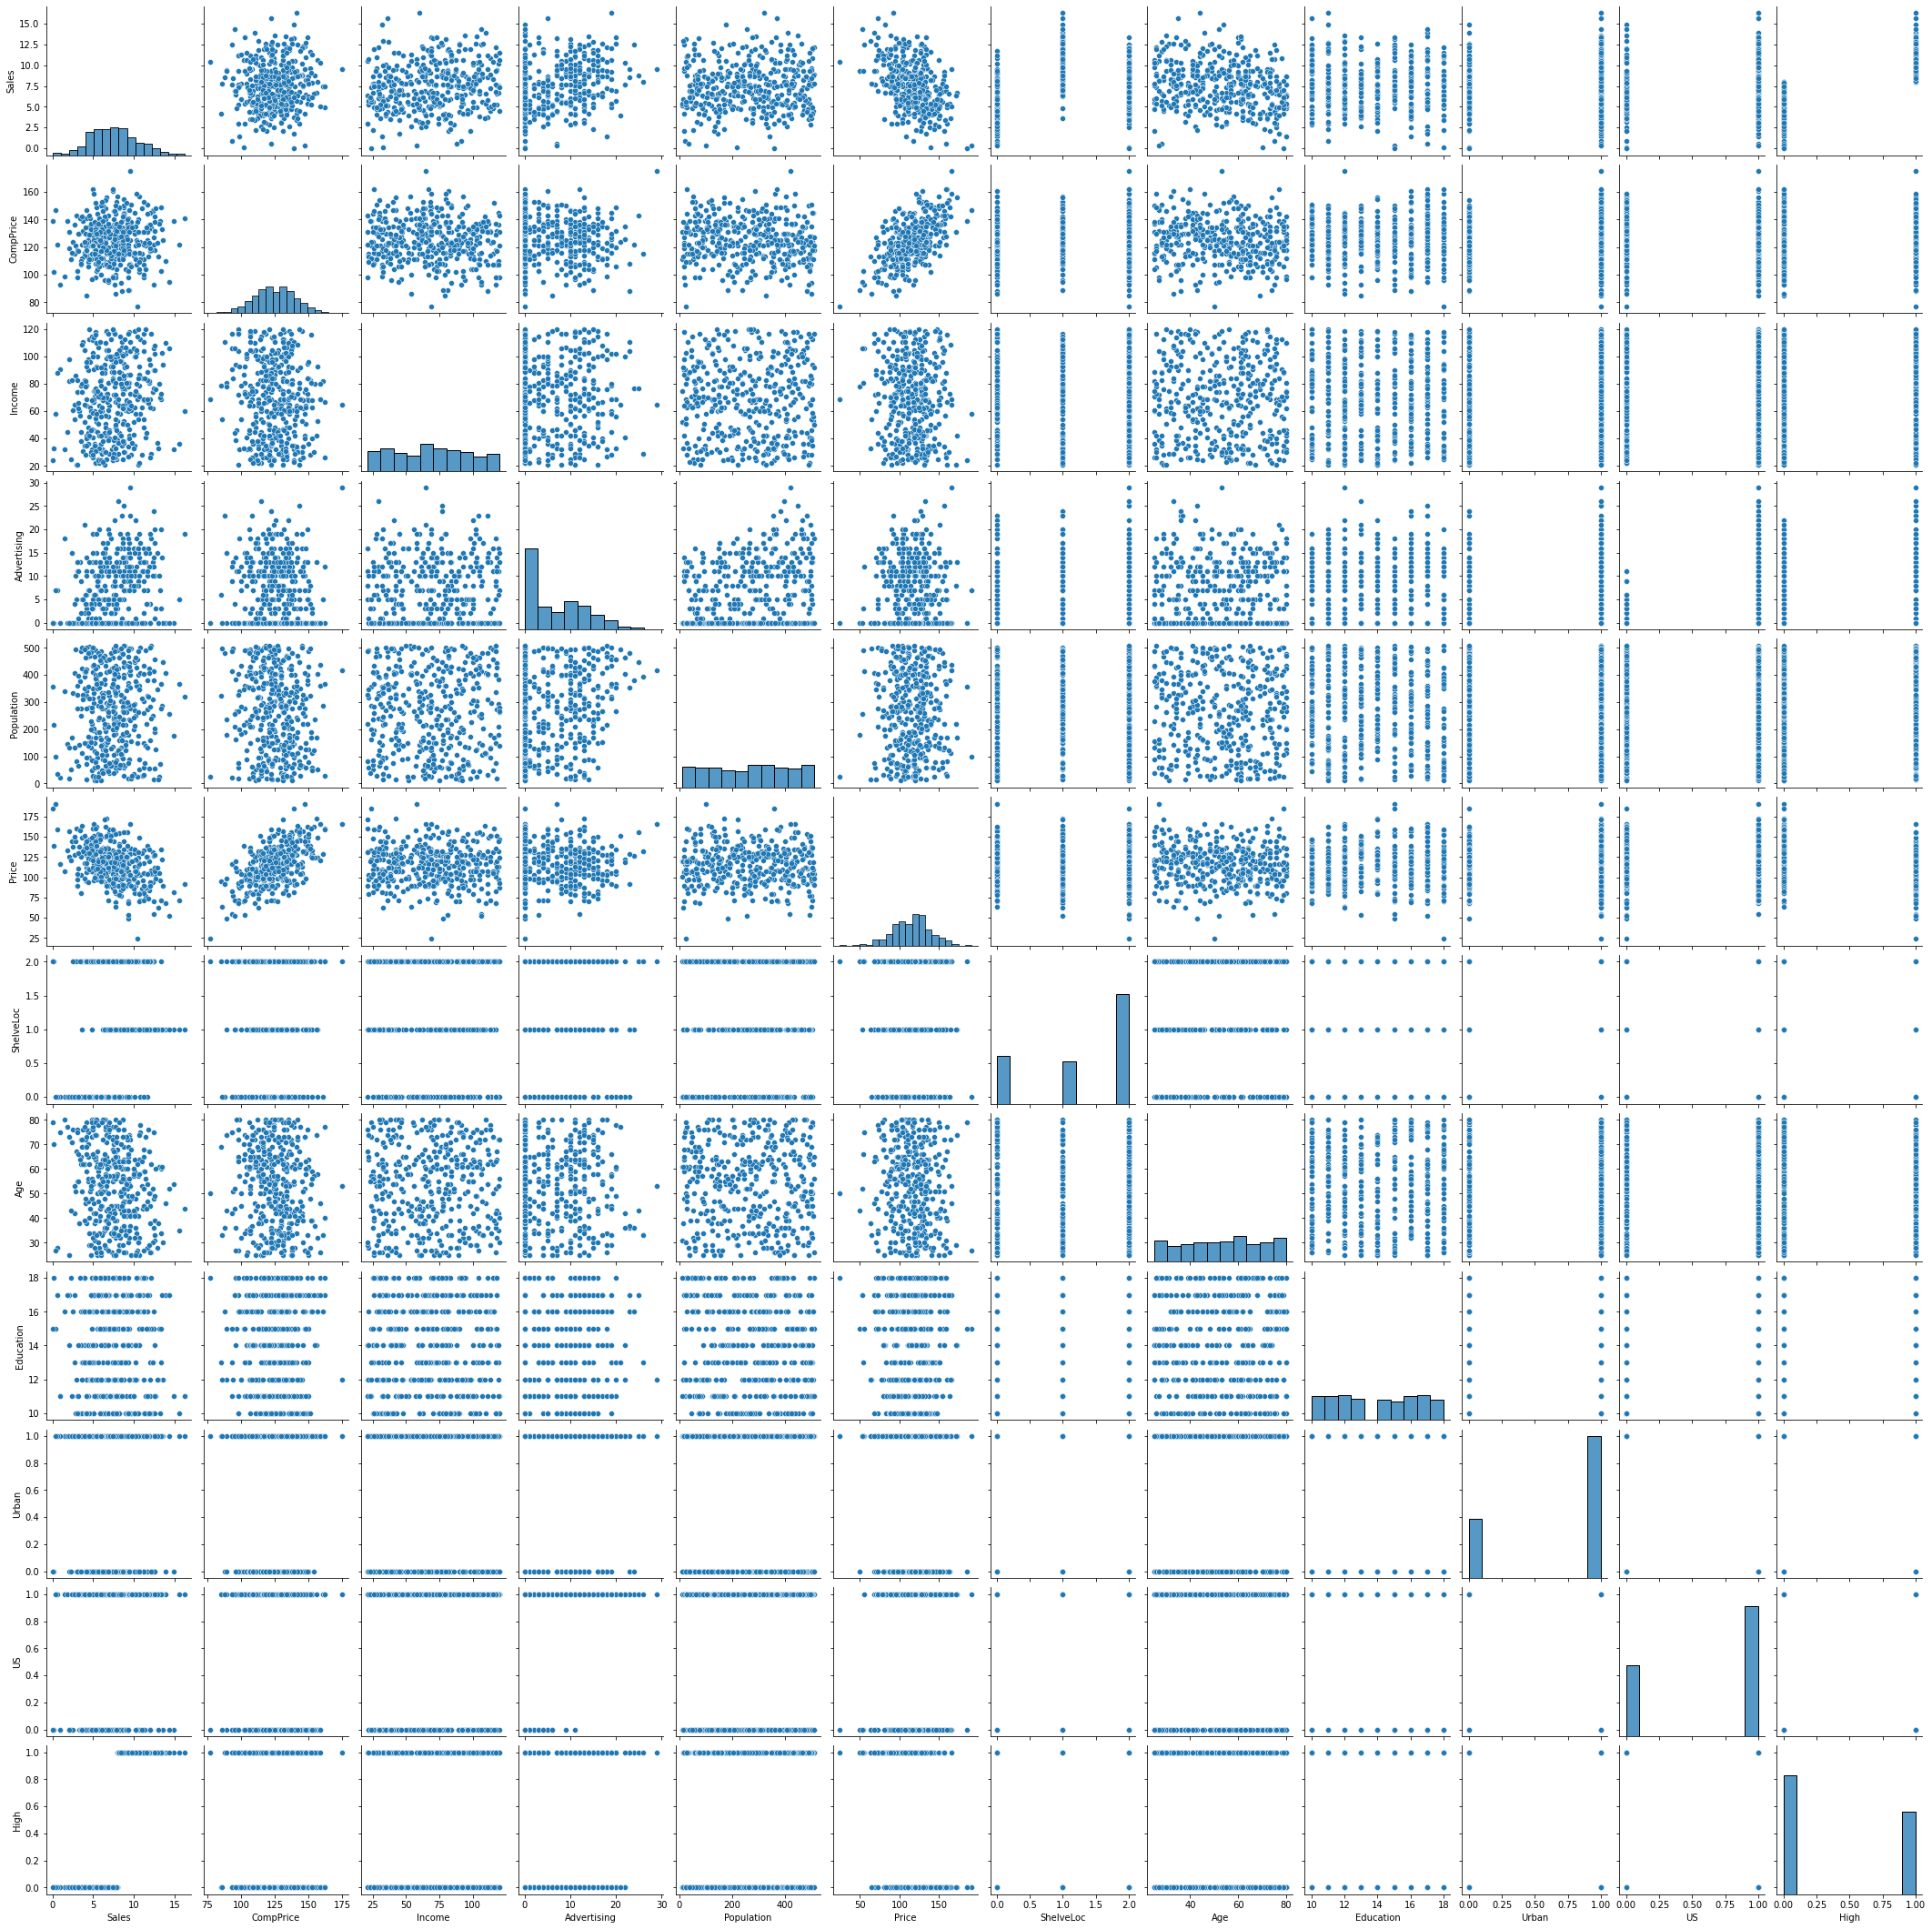

In [17]:
sns.pairplot(company)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


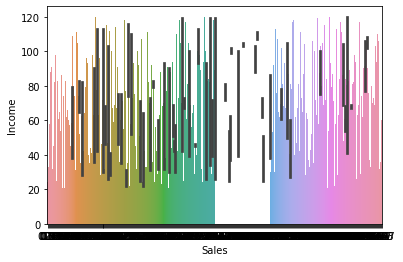

In [18]:
sns.barplot(company['Sales'], company['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


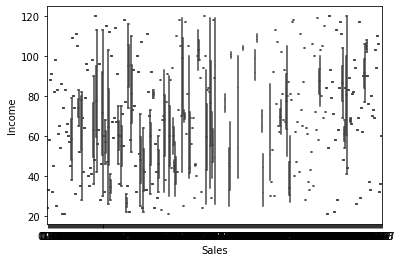

In [19]:
sns.boxplot(company['Sales'], company['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


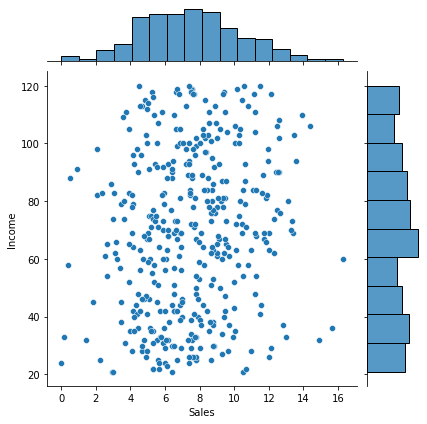

In [20]:
sns.jointplot(company['Sales'], company['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


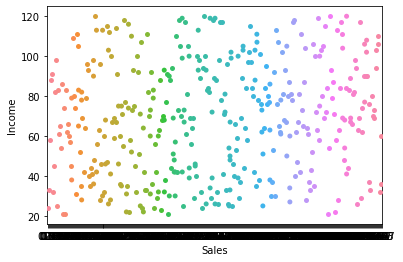

In [21]:
sns.stripplot(company['Sales'], company['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


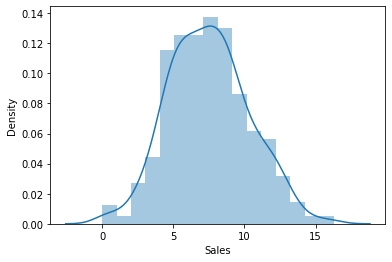

In [22]:
sns.distplot(company['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


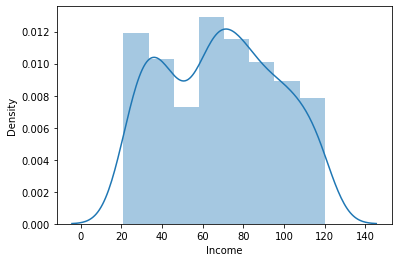

In [23]:
sns.distplot(company['Income'])

In [24]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']

In [25]:
x = company.drop(['Sales', 'High'], axis = 1)

In [26]:
x = company[feature_cols]

In [27]:
y = company.High

In [28]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [29]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [32]:
print(x_train)

     CompPrice  Income  Advertising  Population  ...  Age  Education  Urban  US
250        137     105           10         435  ...   72         14      1   1
63         119      88           10         170  ...   61         13      1   1
312        137     117            5         337  ...   38         10      1   1
159        119      60            0         372  ...   30         18      0   0
283        135     110            0         112  ...   80         16      0   0
..         ...     ...          ...         ...  ...  ...        ...    ...  ..
323        107     105           18         428  ...   34         12      1   1
192        108      26            0         408  ...   56         14      0   0
117        145      53            0         507  ...   41         12      1   0
47         126      98            0         173  ...   55         16      1   0
172        104     102           13         123  ...   35         16      1   1

[300 rows x 10 columns]


In [33]:
print(y_train)

250    1
63     1
312    0
159    1
283    0
      ..
323    1
192    0
117    1
47     0
172    1
Name: High, Length: 300, dtype: int64


In [34]:
print(x_test)

     CompPrice  Income  Advertising  Population  ...  Age  Education  Urban  US
132        125      87            9         232  ...   72         10      1   1
309        131     111           13          33  ...   68         18      1   1
341         98     120            0         268  ...   72         10      0   0
196        130      28            6         410  ...   72         16      1   1
246        120      56           20         266  ...   78         18      1   1
..         ...     ...          ...         ...  ...  ...        ...    ...  ..
146        114      83            0         412  ...   39         14      1   0
135         96      94           14         384  ...   36         18      0   1
390        108      75            9          61  ...   67         12      1   1
264        128      29            5         324  ...   31         15      1   1
364        122      21           16         488  ...   30         14      1   1

[100 rows x 10 columns]


In [35]:
print(y_test)

132    1
309    1
341    0
196    0
246    0
      ..
146    0
135    0
390    0
264    0
364    1
Name: High, Length: 100, dtype: int64


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()

In [38]:
x_train = sc.fit_transform(x_train)

In [39]:
x_test = sc.transform(x_test)

In [40]:
x_test

array([[ 1.64789899e-02,  6.94618953e-01,  3.54660846e-01,
        -2.66585224e-01,  8.57328536e-01, -3.43546277e-01,
         1.18062113e+00, -1.52290834e+00,  6.59853543e-01,
         7.66356045e-01],
       [ 4.11974748e-01,  1.56470532e+00,  9.47408779e-01,
        -1.63504076e+00, -1.52217244e+00, -1.52818861e+00,
         9.31763696e-01,  1.60903683e+00,  6.59853543e-01,
         7.66356045e-01],
       [-1.76325192e+00,  1.89098771e+00, -9.79022002e-01,
        -1.90254287e-02, -9.69788285e-01,  8.41096058e-01,
         1.18062113e+00, -1.52290834e+00, -1.51548781e+00,
        -1.30487651e+00],
       [ 3.46058788e-01, -1.44434338e+00, -8.99001031e-02,
         9.57460430e-01,  7.29855270e-01, -1.52818861e+00,
         1.18062113e+00,  8.26050539e-01,  6.59853543e-01,
         7.66356045e-01],
       [-3.13100808e-01, -4.29242610e-01,  1.98471766e+00,
        -3.27787507e-02, -1.09726155e+00, -1.52818861e+00,
         1.55390727e+00,  1.60903683e+00,  6.59853543e-01,
         7.

In [41]:
x_train

array([[ 0.80747051,  1.34718373,  0.50284783, ...,  0.04306425,
         0.65985354,  0.76635604],
       [-0.37901677,  0.73087255,  0.50284783, ..., -0.3484289 ,
         0.65985354,  0.76635604],
       [ 0.80747051,  1.78222692, -0.23808709, ..., -1.52290834,
         0.65985354,  0.76635604],
       ...,
       [ 1.33479818, -0.53800341, -0.979022  , ..., -0.73992205,
         0.65985354, -1.30487651],
       [ 0.08239495,  1.09340854, -0.979022  , ...,  0.82605054,
         0.65985354, -1.30487651],
       [-1.36775616,  1.23842294,  0.94740878, ...,  0.82605054,
         0.65985354,  0.76635604]])

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [43]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
y_pred = classifier.predict(x_test)

In [46]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49  6]
 [19 26]]


In [48]:
accuracy_score(y_test, y_pred)

0.75

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
classifier.score(x_test, y_test)

0.76